# Rain Gauge Quality Comparison - Research Grade Rain Gauges

## Import libraries

In [6]:
import numpy as np
import pandas as pd
import xarray as xr 
import os
import matplotlib.pyplot as plt

## Import ORG/APG Data

In [13]:
ORGAPG_files = "C:/Users/maggi/ANL_Internship_2023/ORG_APG/ORGAPG_0625/*.nc"

In [1]:
ORGAPG_ds = xr.open_mfdataset(ORGAPG_files)

NameError: name 'xr' is not defined

### ORG Data

In [1]:
ORG_precip = ORGAPG_ds.ORG_Precip_Accum - ORGAPG_ds.ORG_Precip_Accum[0]
ORG_precip.plot()
plt.title('Corrected ORG Daily Precipitation')
plt.xlabel('Date')
plt.ylabel('Total Precipitation (mm)')
plt.show()

NameError: name 'ORGAPG_ds' is not defined

### APG Data

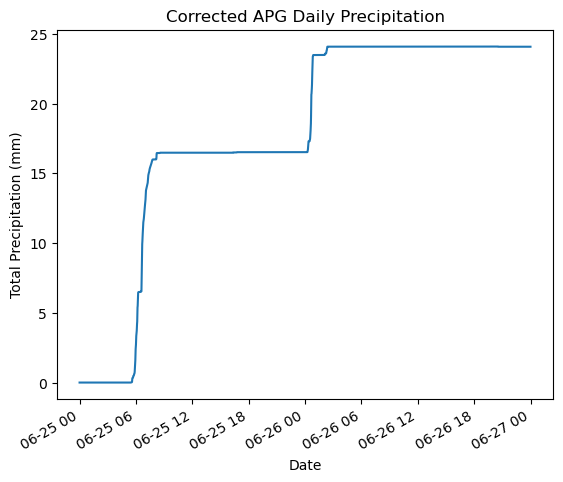

In [97]:
APG_precip = ORGAPG_ds.APG_Precip_Accum - ORGAPG_ds.APG_Precip_Accum[0]
APG_precip.plot()
plt.title('Corrected APG Daily Precipitation')
plt.xlabel('Date')
plt.ylabel('Total Precipitation (mm)')
plt.show()

### 12in Tipping Bucket Data

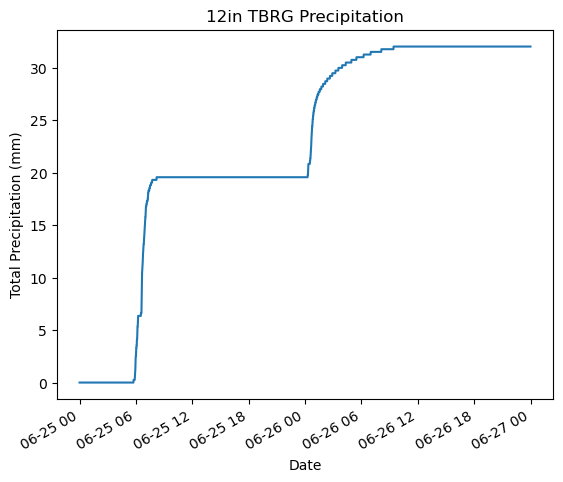

In [101]:
tbrg_12 = np.cumsum(ORGAPG_ds.tb_rain_mm_12in_Tot - ORGAPG_ds.tb_rain_mm_12in_Tot[0])
tbrg_12.plot()
plt.title('12in TBRG Precipitation')
plt.xlabel('Date')
plt.ylabel('Total Precipitation (mm)')
plt.show()

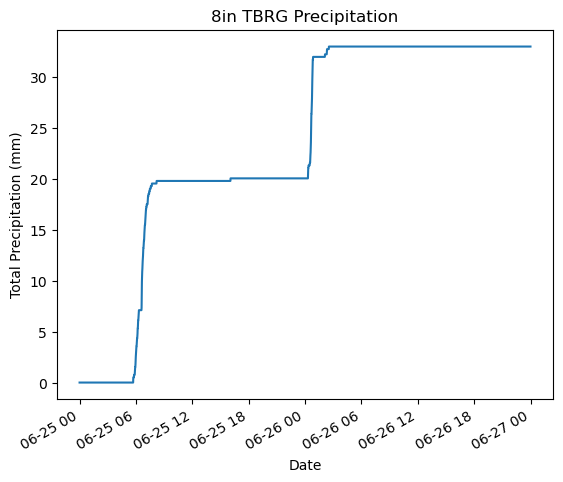

In [102]:
tbrg_8 = np.cumsum(ORGAPG_ds.tb_rain_mm_8in_Tot - ORGAPG_ds.tb_rain_mm_8in_Tot[0])
tbrg_8.plot()
plt.title('8in TBRG Precipitation')
plt.xlabel('Date')
plt.ylabel('Total Precipitation (mm)')
plt.show()

In [49]:
tower_files = "C:/Users/maggi/ANL_Internship_2023/Tower_Rain_Gauge/tower_0625/*.nc"

In [50]:
tower_ds = xr.open_mfdataset(tower_files)

## Plot Tower Data

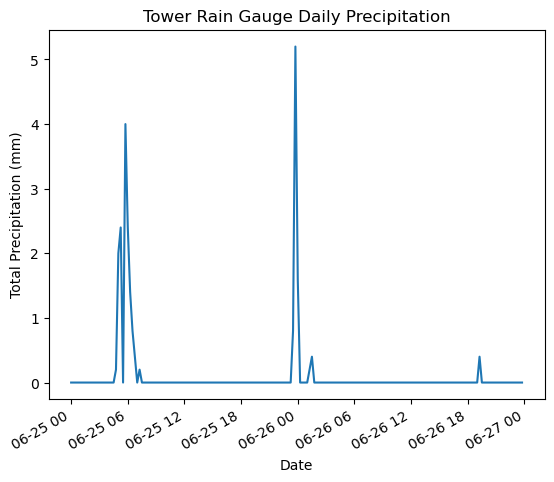

In [51]:
tower_precip = tower_ds.precip
tower_precip.plot()
plt.title('Tower Rain Gauge Daily Precipitation')
plt.xlabel('Date')
plt.ylabel('Total Precipitation (mm)')
plt.show()

Text(0, 0.5, 'Total Precipitation (mm)')

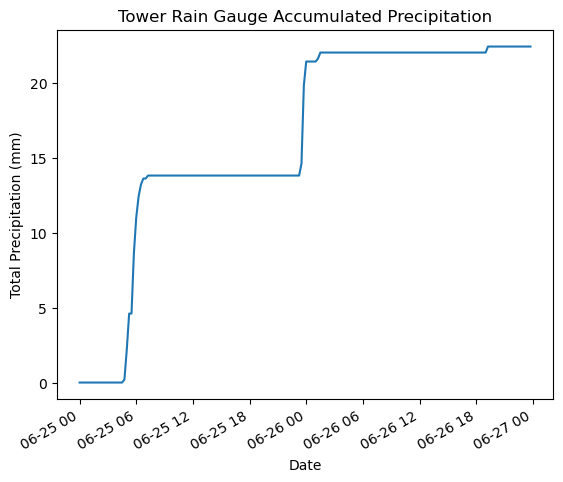

In [52]:
accumulated_tower_precip = np.cumsum(tower_precip)
accumulated_tower_precip.plot()
plt.title('Tower Rain Gauge Accumulated Precipitation')
plt.xlabel('Date')
plt.ylabel('Total Precipitation (mm)')

## Import FD70 Data

In [53]:
FD70_data = "C:/Users/maggi/ANL_Internship_2023/FD70_0625/*.nc"
FD70_ds = xr.open_mfdataset(FD70_data)

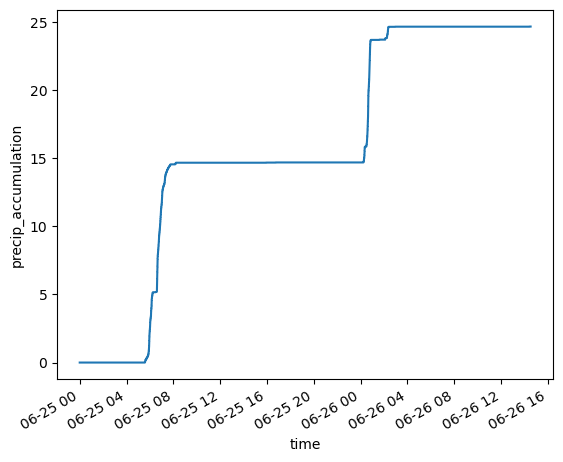

In [54]:
FD70_precip = (FD70_ds.precip_accumulation-FD70_ds.precip_accumulation[0])
FD70_precip.plot()

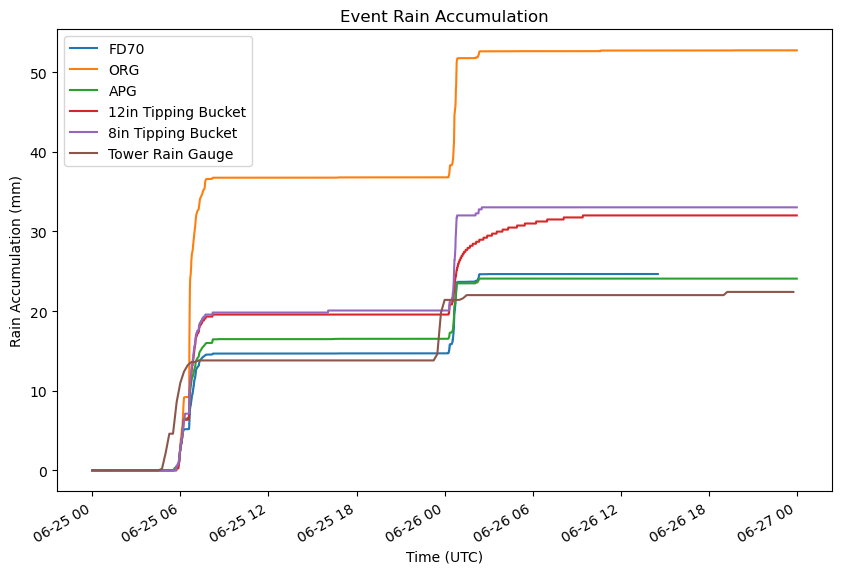

In [103]:
fig, (ax1) = plt.subplots(1, 1, figsize=(10, 6))

FD70_precip.plot(ax=ax1, label='FD70')
ORG_precip.plot(ax=ax1, label='ORG')
APG_precip.plot(ax=ax1, label='APG')
tbrg_12.plot(ax=ax1, label='12in Tipping Bucket')
tbrg_8.plot(ax=ax1, label='8in Tipping Bucket')
accumulated_tower_precip.plot(ax=ax1, label='Tower Rain Gauge')

ax1.set_title('Event Rain Accumulation')
ax1.set_xlabel('Time (UTC)')
ax1.set_ylabel('Rain Accumulation (mm)')
ax1.legend()
# Show the two plots
plt.show()